In [12]:
# ——— Bloque 1: Importaciones e inicialización ———
import numpy as np
import matplotlib.pyplot as plt
from src.frqi_module import FRQI

# ——— Bloque 2: Generación de imagen de prueba ———
def generate_image(image_size=4, use_pattern=True):
    """
    Genera una imagen de tamaño image_size x image_size.
    Si use_pattern=True, usa un patrón fijo; si no, genera valores aleatorios.
    """
    if use_pattern:
        return np.array([[  0, 150,   0,   0],
                         [200, 255, 200,   0],
                         [  0, 200, 255, 200],
                         [  0,   0, 150,   0]], dtype=np.uint8)
    else:
        return np.random.randint(0, 256, (image_size, image_size), dtype=np.uint8)

image_size = 4

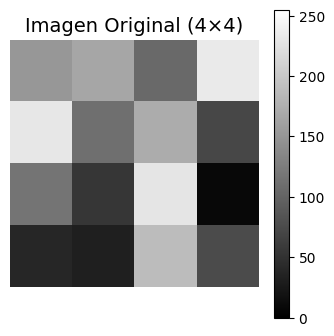

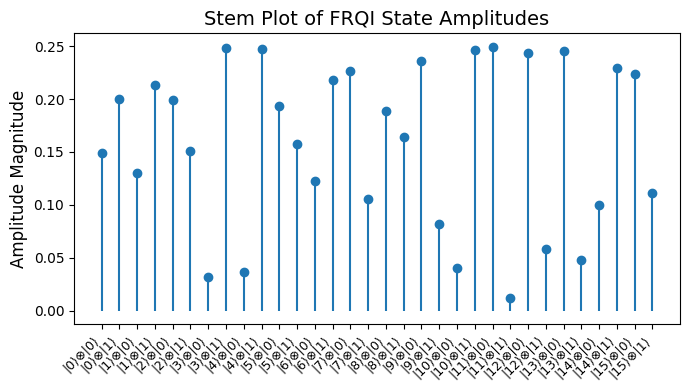

🔹 Encoded quantum state (non-zero amplitudes):
  |0⟩⊗|0⟩ : 0.149+0.000j
  |0⟩⊗|1⟩ : 0.200+0.000j
  |1⟩⊗|0⟩ : 0.130+0.000j
  |1⟩⊗|1⟩ : 0.213+0.000j
  |2⟩⊗|0⟩ : 0.200+0.000j
  |2⟩⊗|1⟩ : 0.151+0.000j
  |3⟩⊗|0⟩ : 0.032+0.000j
  |3⟩⊗|1⟩ : 0.248+0.000j
  |4⟩⊗|0⟩ : 0.037+0.000j
  |4⟩⊗|1⟩ : 0.247+0.000j
  |5⟩⊗|0⟩ : 0.194+0.000j
  |5⟩⊗|1⟩ : 0.158+0.000j
  |6⟩⊗|0⟩ : 0.122+0.000j
  |6⟩⊗|1⟩ : 0.218+0.000j
  |7⟩⊗|0⟩ : 0.226+0.000j
  |7⟩⊗|1⟩ : 0.106+0.000j
  |8⟩⊗|0⟩ : 0.189+0.000j
  |8⟩⊗|1⟩ : 0.164+0.000j
  |9⟩⊗|0⟩ : 0.236+0.000j
  |9⟩⊗|1⟩ : 0.082+0.000j
  |10⟩⊗|0⟩ : 0.040+0.000j
  |10⟩⊗|1⟩ : 0.247+0.000j
  |11⟩⊗|0⟩ : 0.250+0.000j
  |11⟩⊗|1⟩ : 0.012+0.000j
  |12⟩⊗|0⟩ : 0.243+0.000j
  |12⟩⊗|1⟩ : 0.058+0.000j
  |13⟩⊗|0⟩ : 0.245+0.000j
  |13⟩⊗|1⟩ : 0.047+0.000j
  |14⟩⊗|0⟩ : 0.100+0.000j
  |14⟩⊗|1⟩ : 0.229+0.000j
  |15⟩⊗|0⟩ : 0.224+0.000j
  |15⟩⊗|1⟩ : 0.111+0.000j
🔹 Estado cuántico codificado (amplitudes significativas):
  |00000⟩ : 0.149+0.000j
  |00001⟩ : 0.200+0.000j
  |00010⟩ : 0.130+0.000j
  |00011

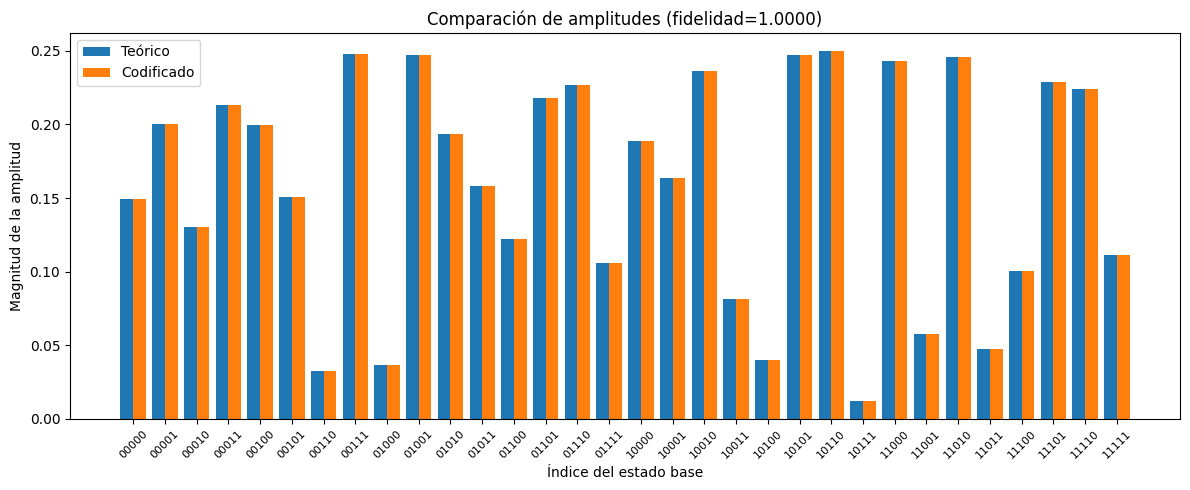

Fidelidad: 1.000000
Diferencia máxima de amplitudes: 0.000000

✅ Fidelidad entre estado codificado y teórico: 1.000000 bits

🔹 Medidas informacionales:
  H_total             : 0.000000 bits
  H_position          : 0.672156 bits
  H_color             : 0.672156 bits
  H_joint             : 0.000000 bits
  H_color|position    : -0.672156 bits
  H_position|color    : -0.672156 bits
  I(color:position)   : 1.344312 bits


In [ ]:

image = generate_image(image_size=image_size, use_pattern=False)

# Mostrar imagen original
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(f"Imagen Original ({image_size}×{image_size})", fontsize=14)
plt.axis('off')
plt.colorbar()
plt.show()

# ——— Block 3: FRQI Encoding + Stem Plot with Distinct Position/Color Labels ———

frqi = FRQI(image_size=image_size)
state = frqi.encode(image)
amplitudes = np.abs(state)

# Prepare labels separating position (integer) and color (0 or 1)
labels = []
for idx in range(len(amplitudes)):
    pos = idx >> 1         # all bits except LSB
    color = idx & 1        # least-significant bit
    labels.append(f"|{pos}⟩⊗|{color}⟩")

# Stem plot
fig, ax = plt.subplots(figsize=(7, 4))
x = np.arange(len(amplitudes))
markerline, stemlines, baseline = ax.stem(
    x, amplitudes,
    linefmt='C0-', markerfmt='C0o', basefmt=" "
)
plt.setp(baseline, visible=False)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
ax.set_ylabel("Amplitude Magnitude", fontsize=12)
ax.set_title("Stem Plot of FRQI State Amplitudes", fontsize=14)
plt.tight_layout()
plt.show()

# Print only non‑zero amplitudes with pos/color notation
print("🔹 Encoded quantum state (non-zero amplitudes):")
for idx, amp in enumerate(state):
    if abs(amp) > 1e-6:
        pos = idx >> 1
        color = idx & 1
        print(f"  |{pos}⟩⊗|{color}⟩ : {amp:.3f}")



# Imprimir estado generado (amplitudes no nulas)
print("🔹 Estado cuántico codificado (amplitudes significativas):")
for idx, amp in enumerate(state):
    if abs(amp) > 1e-6:
        print(f"  |{format(idx, f'0{frqi.n_qubits}b')}⟩ : {amp:.3f}")

# ——— Bloque 4: Comparación con estado teórico ———
fidelity = frqi.compare_with_theoretical(state, image)
print(f"\n✅ Fidelidad entre estado codificado y teórico: {fidelity:.6f} bits")

# ——— Bloque 5: Cálculo de todas las medidas informacionales ———
analysis = frqi.analyze_state(state)
print("\n🔹 Medidas informacionales:")
for name, val in analysis.items():
    print(f"  {name:20}: {val:.6f} bits")


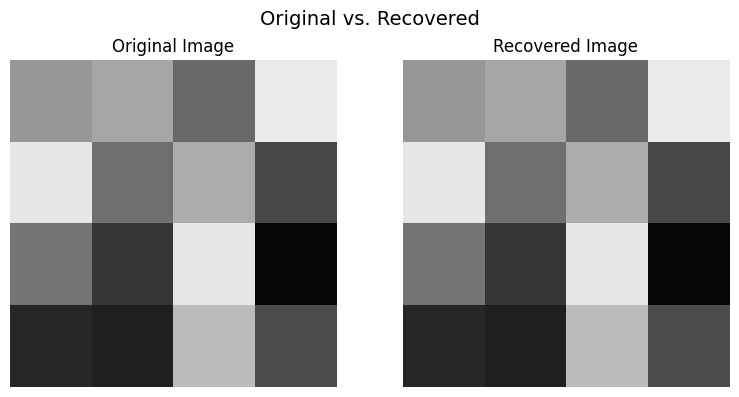

🔹 Image Recovery Metrics:
  • MSE : 0.0000
  • PSNR: inf dB


In [ ]:
# ——— Bloque 6: Recuperación de imagen y evaluación ———

# 1) Recuperar imagen desde el estado cuántico
recovered = frqi.recover_image(state)

# 2) Mostrar lado a lado original vs recuperada
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original Image", fontsize=12)
axes[0].axis('off')

axes[1].imshow(recovered, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Recovered Image", fontsize=12)
axes[1].axis('off')

plt.suptitle("Original vs. Recovered", fontsize=14)
plt.tight_layout()
plt.show()

# 3) Cálculo de métricas clásicas
mse  = np.mean((image.astype(float) - recovered.astype(float))**2)
psnr = 20 * np.log10(255.0 / np.sqrt(mse)) if mse > 0 else float('inf')

print("🔹 Image Recovery Metrics:")
print(f"  • MSE : {mse:.4f}")
print(f"  • PSNR: {psnr:.2f} dB")


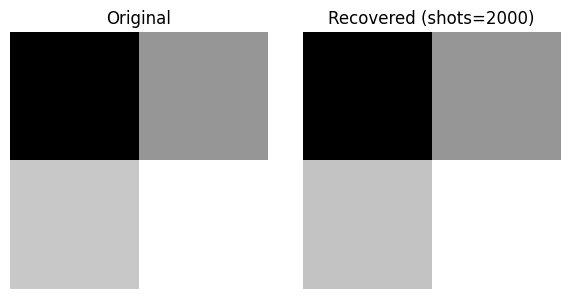

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from src.frqi_module import FRQI

# Parameters
image_size = 2
use_pattern = True
shots = 2000

# 1. Generate test image and encode angles
frqi = FRQI(image_size=image_size)
image = np.array([[0, 150], [200, 255]], dtype=np.uint8) if use_pattern else np.random.randint(0,256,(image_size,image_size))
angles = frqi._flatten_angles(image)

# 2. Define sampling device
dev = qml.device("default.qubit", wires=frqi.n_qubits, shots=shots)
@qml.qnode(dev)
def sample_circuit(angles):
    frqi._apply_hadamards()
    frqi._angle_encoding(angles, target_wire=frqi.n_position_qubits)
    return qml.sample(wires=range(frqi.n_qubits))

# 3. Run sampling
samples = sample_circuit(angles)
# samples shape: (shots, n_qubits)

# 4. Decode measurements
# Bits: sample row [b0,...,b_n-2, b_color]
positions = samples[:, :-1]
colors = samples[:, -1]
# Convert position bits to integer index
pos_indices = positions.dot(1 << np.arange(positions.shape[1]-1, -1, -1))

# 5. Accumulate counts
counts = {i: {'total':0, 'color1':0} for i in range(image_size**2)}
for pos, col in zip(pos_indices, colors):
    counts[pos]['total'] += 1
    counts[pos]['color1'] += int(col)

# 6. Estimate probabilities and reconstruct
reconstructed = np.zeros((image_size, image_size))
for pos, vals in counts.items():
    if vals['total'] > 0:
        p_color1 = vals['color1'] / vals['total']
    else:
        p_color1 = 0
    theta = np.arcsin(np.sqrt(p_color1))
    intensity = (2/np.pi) * theta * 255
    row, col = divmod(pos, image_size)
    reconstructed[row, col] = intensity

# 7. Plot results
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(reconstructed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Recovered (shots={shots})')
axes[1].axis('off')
plt.tight_layout()
plt.show()


In [1]:
def generate_image(image_size=4, use_pattern=True):
    """
    Genera una imagen de tamaño image_size x image_size.
    Si use_pattern=True, usa un patrón fijo; si no, genera valores aleatorios.
    """
    if use_pattern:
        return np.array([[  0, 150,   0,   0],
                         [200, 255, 200,   0],
                         [  0, 200, 255, 200],
                         [  0,   0, 150,   0]], dtype=np.uint8)
    else:
        return np.random.randint(0, 256, (image_size, image_size), dtype=np.uint8)

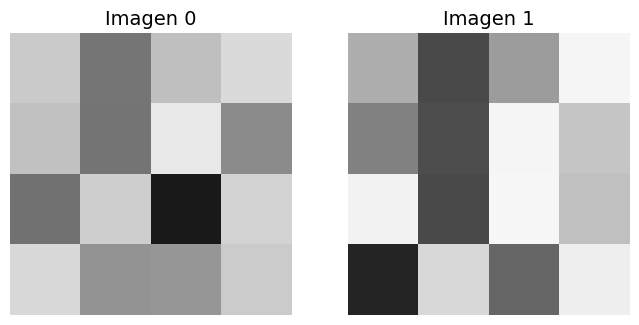

In [2]:
# ——— Block 1: Parameters & Test Images ———
import numpy as np
import matplotlib.pyplot as plt
from src.quantum_image import FRQI, FRQI2, FRQI3

# User parameters
image_size      = 4         # N × N pixel patch
n_color_qubits  = 2       # 1 for FRQI, 2 for FRQI2
use_pattern     = False     # True = fixed pattern; False = random

# Generate one random test image per color qubit
images = []
for k in range(n_color_qubits):
    img = np.random.randint(0, 256, (image_size, image_size), dtype=np.uint8)
    images.append(img)

# Display all channels
fig, axes = plt.subplots(1, n_color_qubits, figsize=(4*n_color_qubits, 4))
for k, ax in enumerate(axes if n_color_qubits>1 else [axes]):
    ax.imshow(images[k], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"Imagen {k}", fontsize=14)
    ax.axis('off')
plt.show()


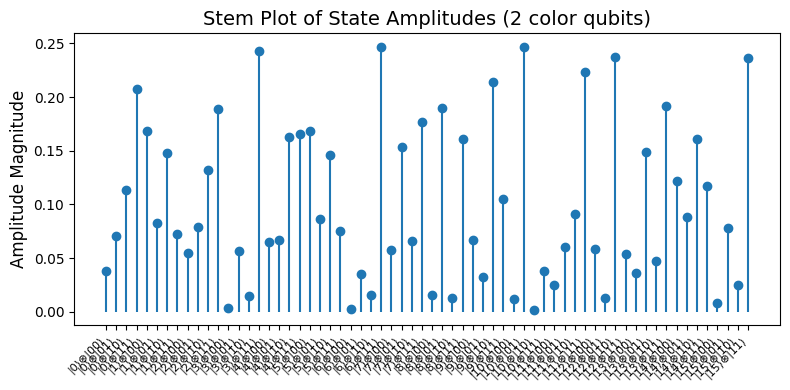

🔹 Encoded quantum state (non‑zero amplitudes):
  |0⟩⊗|00⟩ : 0.0384+0.0000j
  |0⟩⊗|01⟩ : 0.0704+0.0000j
  |0⟩⊗|10⟩ : 0.1133+0.0000j
  |0⟩⊗|11⟩ : 0.2079+0.0000j
  |1⟩⊗|00⟩ : 0.1687+0.0000j
  |1⟩⊗|01⟩ : 0.0827+0.0000j
  |1⟩⊗|10⟩ : 0.1481+0.0000j
  |1⟩⊗|11⟩ : 0.0726+0.0000j
  |2⟩⊗|00⟩ : 0.0550+0.0000j
  |2⟩⊗|01⟩ : 0.0787+0.0000j
  |2⟩⊗|10⟩ : 0.1322+0.0000j
  |2⟩⊗|11⟩ : 0.1892+0.0000j
  |3⟩⊗|00⟩ : 0.0035+0.0000j
  |3⟩⊗|01⟩ : 0.0564+0.0000j
  |3⟩⊗|10⟩ : 0.0150+0.0000j
  |3⟩⊗|11⟩ : 0.2431+0.0000j
  |4⟩⊗|00⟩ : 0.0653+0.0000j
  |4⟩⊗|01⟩ : 0.0665+0.0000j
  |4⟩⊗|10⟩ : 0.1625+0.0000j
  |4⟩⊗|11⟩ : 0.1655+0.0000j
  |5⟩⊗|00⟩ : 0.1680+0.0000j
  |5⟩⊗|01⟩ : 0.0863+0.0000j
  |5⟩⊗|10⟩ : 0.1457+0.0000j
  |5⟩⊗|11⟩ : 0.0748+0.0000j
  |6⟩⊗|00⟩ : 0.0022+0.0000j
  |6⟩⊗|01⟩ : 0.0352+0.0000j
  |6⟩⊗|10⟩ : 0.0152+0.0000j
  |6⟩⊗|11⟩ : 0.2470+0.0000j
  |7⟩⊗|00⟩ : 0.0573+0.0000j
  |7⟩⊗|01⟩ : 0.1535+0.0000j
  |7⟩⊗|10⟩ : 0.0660+0.0000j
  |7⟩⊗|11⟩ : 0.1769+0.0000j
  |8⟩⊗|00⟩ : 0.0153+0.0000j
  |8⟩⊗|01⟩ : 0.1902+0.0000j
 

In [3]:
# ——— Block 2: Encode & Stem‑Plot Amplitudes ———
# Select the appropriate class based on number of color qubits
if n_color_qubits == 1:
    model = FRQI(image_size)
elif n_color_qubits == 2:
    model = FRQI2(image_size)
elif n_color_qubits == 3:
    model = FRQI3(image_size)
else:
    raise ValueError(f"Unsupported number of color qubits: {n_color_qubits}")

# Encode the joint state of all channels
state = model.encode(*images)
amplitudes = np.abs(state)

# Build labels |pos>⊗|color bits>
labels = []
for idx in range(len(amplitudes)):
    pos       = idx >> n_color_qubits
    color_bits = format(idx & ((1 << n_color_qubits) - 1), f'0{n_color_qubits}b')
    labels.append(f"|{pos}⟩⊗|{color_bits}⟩")

# Stem plot
fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(amplitudes))
markerline, stemlines, baseline = ax.stem(x, amplitudes)
plt.setp(baseline, visible=False)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
ax.set_ylabel("Amplitude Magnitude", fontsize=12)
ax.set_title(f"Stem Plot of State Amplitudes ({n_color_qubits} color qubits)", fontsize=14)
plt.tight_layout()
plt.show()

# Print non‑zero amplitudes
print("🔹 Encoded quantum state (non‑zero amplitudes):")
for idx, amp in enumerate(state):
    if abs(amp) > 1e-6:
        pos        = idx >> n_color_qubits
        color_bits = format(idx & ((1 << n_color_qubits) - 1), f'0{n_color_qubits}b')
        print(f"  |{pos}⟩⊗|{color_bits}⟩ : {amp:.4f}")


Fidelity: 1.000000

Overall state fidelity: 1.000000



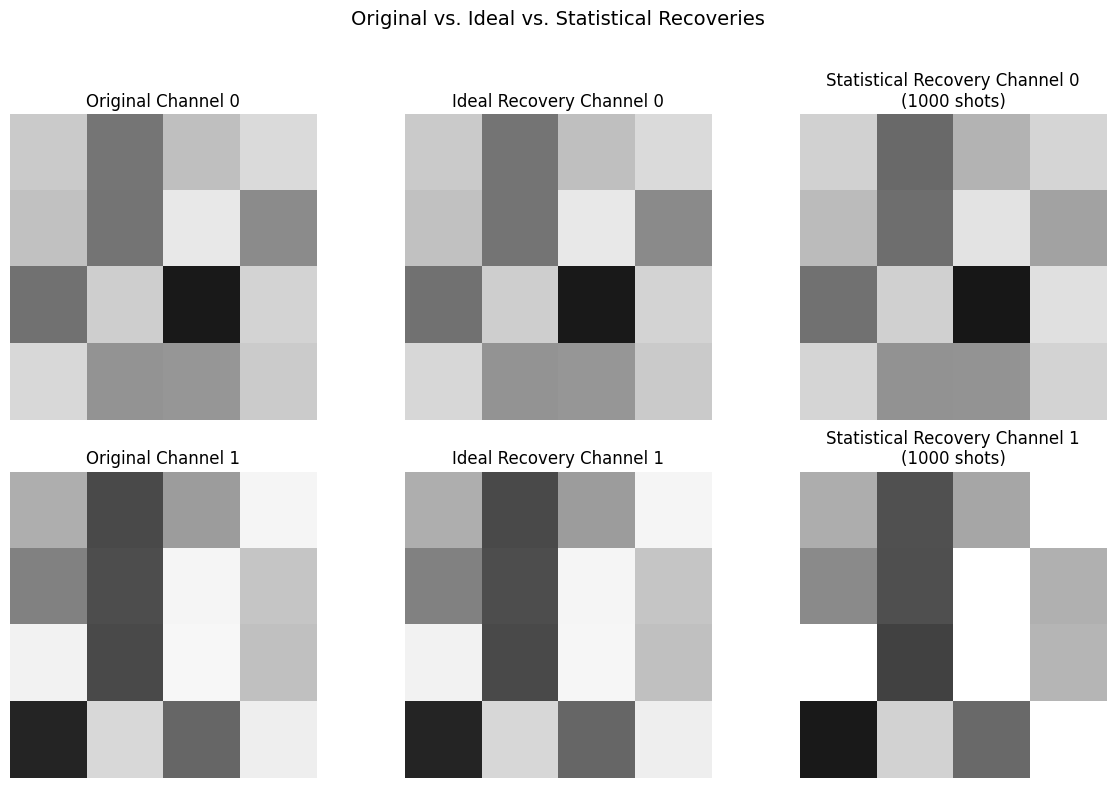

🔹 Information Measures:
  H_total                  : 0.000000 bits
  H_position               : 1.109469 bits
  H_color0                 : 0.454955 bits
  I(color0:position)       : 0.899532 bits
  H_color0|position        : -0.444577 bits
  H_color1                 : 0.664892 bits
  I(color1:position)       : 1.319406 bits
  H_color1|position        : -0.654514 bits
  H_colors_joint           : 1.109469 bits
  I(color0:color1)         : 0.010378 bits
  H_color0|color1          : 0.444577 bits
  H_color1|color0          : 0.654514 bits
  I3(position:color0:color1): 0.000000 bits


In [4]:
# ——— Block 3: Compare, Recover & Analyze ———
import numpy as np
import matplotlib.pyplot as plt

# 1) Compute fidelity & print
fidelity = model.compare_with_theoretical(state, *images)
print(f"\nOverall state fidelity: {fidelity:.6f}\n")

# 2) Recover images
rec_ideal = model.recover(state, shots=None)    # ideal infinite shots
rec_stat  = model.recover(state, shots=1000)    # statistical sampling

# 3) Plot original / ideal / statistical side by side per channel
fig, axes = plt.subplots(n_color_qubits, 3, figsize=(12, 4*n_color_qubits))

for k in range(n_color_qubits):
    # Original
    ax = axes[k, 0] if n_color_qubits>1 else axes[0]
    ax.imshow(images[k], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"Original Channel {k}", fontsize=12)
    ax.axis('off')

    # Ideal recovery
    ax = axes[k, 1] if n_color_qubits>1 else axes[1]
    ax.imshow(rec_ideal[k], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"Ideal Recovery Channel {k}", fontsize=12)
    ax.axis('off')

    # Statistical recovery
    ax = axes[k, 2] if n_color_qubits>1 else axes[2]
    ax.imshow(rec_stat[k], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"Statistical Recovery Channel {k}\n(1000 shots)", fontsize=12)
    ax.axis('off')

plt.suptitle("Original vs. Ideal vs. Statistical Recoveries", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

# 4) Information measures (only meaningful if n_color_qubits ≥ 2)
stats = model.analyze_state(state)
print("🔹 Information Measures:")
for name, val in stats.items():
    print(f"  {name:25}: {val:.6f} bits")


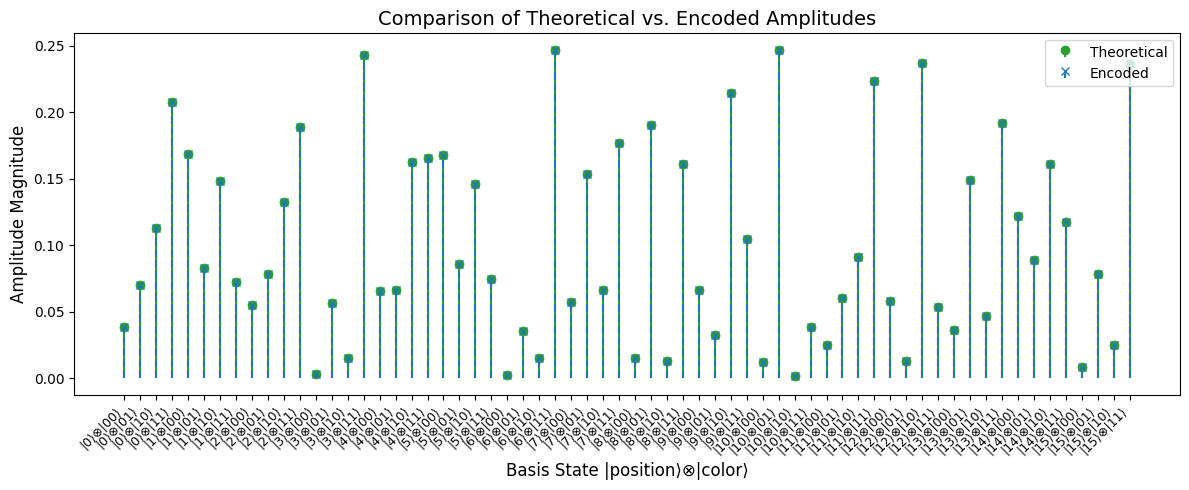

Top amplitude differences (index, theoretical, encoded, Δ):
   63 | |15⟩⊗|11⟩ | 0.2360 | 0.2360 | 0.0000
   15 | |3⟩⊗|11⟩ | 0.2431 | 0.2431 | 0.0000
   27 | |6⟩⊗|11⟩ | 0.2470 | 0.2470 | 0.0000
   50 | |12⟩⊗|10⟩ | 0.2369 | 0.2369 | 0.0000
   38 | |9⟩⊗|10⟩ | 0.2143 | 0.2143 | 0.0000


In [6]:
# ——— Block 4: Theoretical vs. Encoded Amplitudes Plot (Notebook) ———
# This block follows Block 3 in your notebook. It creates a clear comparison plot.
import numpy as np
import matplotlib.pyplot as plt

# Compute analytic and encoded amplitudes
theo = model.theoretical_state(*images)
circ = state
x = np.arange(len(theo))

# Stem plot with explanatory text for novices
fig, ax = plt.subplots(figsize=(12, 5))

# Plot theoretical amplitudes
ax.stem(x, np.abs(theo), linefmt='C2-', markerfmt='C2o', basefmt=' ', label='Theoretical')
# Plot encoded amplitudes
ax.stem(x, np.abs(circ), linefmt='C0--', markerfmt='C0x', basefmt=' ', label='Encoded')

# Axes labels and title in English for clarity
tick_labels = labels  # from Block 2
ax.set_xticks(x)
ax.set_xticklabels(tick_labels, rotation=45, ha='right', fontsize=9)
ax.set_xlabel('Basis State |position⟩⊗|color⟩', fontsize=12)
ax.set_ylabel('Amplitude Magnitude', fontsize=12)
ax.set_title('Comparison of Theoretical vs. Encoded Amplitudes', fontsize=14)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Optional: print top differences for quick insight
diffs = np.abs(np.abs(theo) - np.abs(circ))
top5 = np.argsort(diffs)[-5:][::-1]
print("Top amplitude differences (index, theoretical, encoded, Δ):")
for idx in top5:
    print(f"  {idx:3d} | {labels[idx]:8s} | {np.abs(theo[idx]):.4f} | {np.abs(circ[idx]):.4f} | {diffs[idx]:.4f}")
